In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mulM(A,B,type=np.float64):

    if len(np.shape(A)) == 1:
        A = np.reshape(A,(1,len(A)))

    if len(np.shape(B)) == 1:
        B = np.reshape(B,(len(B),1))

    AB = np.zeros(shape=(np.shape(A)[0],np.shape(B)[1]),dtype=type)

    if np.shape(A)[1] == np.shape(B)[0]:
        for i in range(np.shape(B)[1]):
            for j in range(np.shape(A)[0]):
                suma = 0
                for k in range(np.shape(A)[1]):
                    suma += A[j][k]*B[k][i]  
                AB[j][i] = suma
    else:
        AB = None
        print('Multiplicación no está definida')
    
    return AB

def NewtonRaphson(z0,Fn,Jn,itmax=1000,error=1e-7):
    
    it = 0
    d = 1.
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = z0

        InvJ = np.linalg.inv(Jn(rc[0],rc[1]))
        
        z0 = rc - np.reshape(mulM(InvJ,Fn(rc[0],rc[1])),-1)
        
        d = np.max(np.abs(z0 - rc))
        
        it += 1
    
    return np.round(z0,7)

def GetRoots(z0,Fn,Jn,tolerancia = 7):
    
    Roots = []
    
    for i in z0:
        
        root = NewtonRaphson(i,Fn,Jn)
        #print(root)

        if  type(root)!=bool:
            croot = tuple(root)

            if croot not in Roots:
                Roots.append(croot)
    Roots.sort()
    
    return Roots

In [3]:
w = 114.6
q = 3./10000.
k = 9000000000.
l = 5.

In [4]:
x , y = sym.symbols('x y', real=True)
z = x + sym.I*y
f = (z**6) + ((((2*np.sqrt(2)+1)*k*(q**2))/((l**2)*w))**2)*(z**2) - ((((2*np.sqrt(2)+1)*k*(q**2))/((l**2)*w))**2)
#f = (z**6) + (((9+4*np.sqrt(2))*72900)/36481)*(z**2) - (((9+4*np.sqrt(2))*72900)/36481)
F = sym.Matrix([sym.re(f),sym.im(f)])
J = F.jacobian(sym.Matrix([x,y]))
Fn = sym.lambdify([x,y],F,'numpy')
Jn = sym.lambdify([x,y],J,'numpy')

N = 6
x = np.linspace(-1, 1, N)
y = np.linspace(-1.5, 1.5, N)

R = []
for i in range(N):
    for j in range(N):
        r = np.array([x[i],y[j]])
        R.append(r)

Roots = GetRoots(R,Fn,Jn)
Roots

[(-0.8385682, 0.0),
 (-0.6852563, -0.9061868),
 (-0.6852563, 0.9061868),
 (0.6852563, -0.9061868),
 (0.6852563, 0.9061868),
 (0.8385682, 0.0)]

Text(0, 0.5, 'Im')

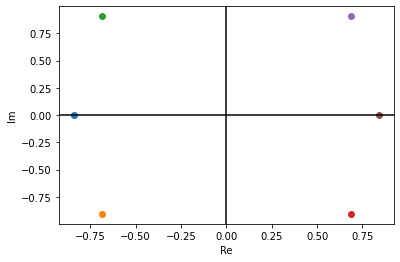

In [5]:
for i in Roots:
    plt.scatter(i[0],i[1])

plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Re')
plt.ylabel('Im')

Como sabemos que:

$\displaystyle u = \sin{\left(\theta \right)}$

$\displaystyle 0 \geq \theta \geq \pi/2 , \theta \in \mathbb{R}$

Entonces solo consideraremos la raiz real positiva.

In [6]:
teta = (np.arcsin(Roots[-1][0])*180)/np.pi
round(teta,2)

56.99

$% \usepackage{gensymb}$
$\displaystyle \theta \approx 57\degree$